In [10]:
import matplotlib.pyplot as plt
import numpy as np
import torch

np.random.seed(12345)

x = np.arange(0, 100) + np.random.normal(0, 3, size=100)
x = torch.FloatTensor(x).view(100, 1)

y = np.concatenate((
    np.random.normal(1, 0.5, size=10),
    np.random.normal(1, 0.5, size=10),
    np.random.normal(3, 0.5, size=10),
    np.random.normal(5, 0.5, size=40),
    np.random.normal(3, 0.5, size=30)
))
y = torch.FloatTensor(y).view(100, 1)

layer_one = torch.nn.Linear(1, 2)
activ_fun = torch.nn.Softplus()
layer_two = torch.nn.Linear(2, 1)
costs_fun = torch.nn.MSELoss()

def myDeep(pt):
    foo = layer_one(pt)
    bar = activ_fun(foo)
    return layer_two(bar)

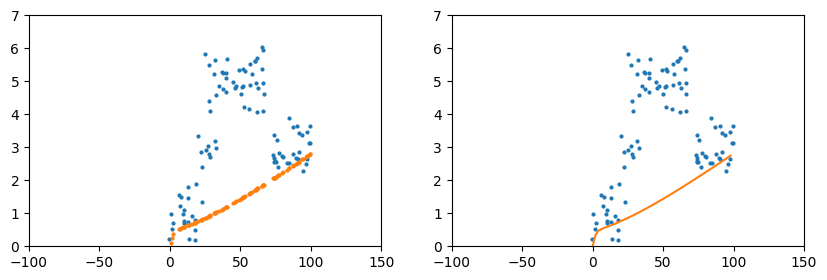

In [32]:
plt.rcParams['lines.markersize'] = 2
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))

axs[0].set_xlim(-100, 150)
axs[0].set_ylim(0, 7)
axs[0].scatter(x, y);
axs[0].scatter(x, myDeep(x).detach().numpy());

domain = torch.FloatTensor(np.arange(-100, 100, 2)).view(100, 1)
axs[1].set_xlim(-100, 150)
axs[1].set_ylim(0, 7)
axs[1].scatter(x, y);
axs[1].plot(domain, myDeep(domain).detach().numpy(), color="#ff7f0f");